### Load necessary libraries

In [1]:
from cellpose import io, models, plot
from stardist.models import StarDist2D
import matplotlib.pyplot as plt
from csbdeep.utils import normalize
from stardist.plot import render_label
import numpy as np

### Methods for loading and displaying model predictions

In [18]:
def display_stardist(img, model):
    img = normalize(img)
    labels, _ = model.predict_instances(img)

    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("input image")

    plt.subplot(1,2,2)
    plt.imshow(render_label(labels, img=img))
    plt.axis("off")
    plt.title("prediction + input overlay")

In [4]:
def load_all_stardist():
    models = ({
        StarDist2D.from_pretrained('2D_versatile_he'): '2D_versatile_he',
        StarDist2D.from_pretrained('2D_versatile_fluo'): '2D_versatile_fluo',
        StarDist2D.from_pretrained('2D_paper_dsb2018'): '2D_paper_dsb2018'   
    })

    return models

all_stardist = load_all_stardist()

Found model '2D_versatile_he' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Found model '2D_paper_dsb2018' for 'StarDist2D'.
Loading network weights from 'weights_last.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.417819, nms_thresh=0.5.


In [60]:
def display_cellpose(img, models, chan):

    fig = plt.figure(figsize=(12,5))
    if img.shape[2] == 2:
        display_img = img[:,:,1]
    else:
        display_img = img
    plt.subplot(1,5,1)
    plt.imshow(display_img)
    plt.axis("off")
    plt.title("input image")


    for i in range(2,6):
        model = list(models.keys())[i-2]
        masks, flow, styles, diam = model.eval(img, diameter=None, channels=chan)
        plt.subplot(1,5,i)
        plt.imshow(masks)
        # plot.show_segmentation(fig, img, masks, flow, channels=chan)
        plt.axis("off")
        plt.title(f"{models[model]}")

In [6]:
def load_all_cellpose_models():
    cellpose_models = ({ 
            models.Cellpose(model_type='cyto'): 'cyto',
            models.Cellpose(model_type='cyto2'): 'cyto2',
            models.Cellpose(model_type='cyto3'): 'cyto3',
            models.Cellpose(model_type='nuclei'): 'nuclei'
        })
    return cellpose_models

### H&E model comparison

In [23]:
img_he = io.imread(filename='TCGA-18-5592-01Z-00-DX1.tif')
img_he.shape

(1000, 1000, 3)

Stardist H&E

In [8]:
stardist_he = StarDist2D.from_pretrained('2D_versatile_he')

Found model '2D_versatile_he' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


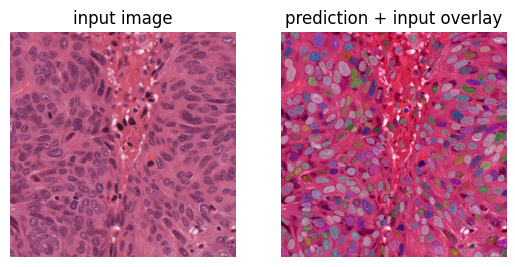

In [9]:
display_stardist(img_he, stardist_he)

Cellpose

fromnumeric.py (3464): Mean of empty slice.
_methods.py (192): invalid value encountered in scalar divide


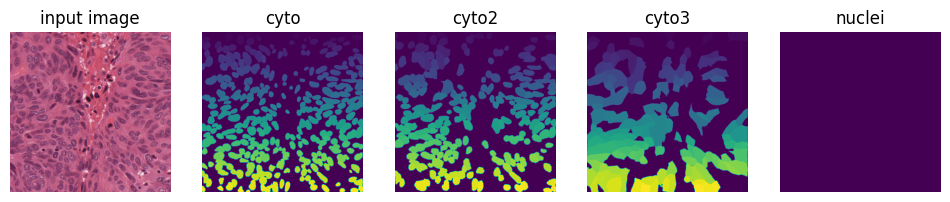

In [50]:
all_cellpose = load_all_cellpose_models()
display_cellpose(img_he, all_cellpose, [2,3])

### SHG + Fluorescence Comparison

In [26]:
img_collagen = io.imread(filename="MAX_registered time points-1.tif")
img_collagen = np.transpose(img_collagen, (0,2,3,1))
img_collagen.shape

100%|██████████| 196/196 [00:00<00:00, 2429.29it/s]


(98, 368, 341, 2)

Stardist

In [43]:
stardist_fluo = list(all_stardist.keys())[1]
stardist_paper = list(all_stardist.keys())[2]

StarDist2D(2D_paper_dsb2018): YXC → YXC
├─ Directory: None
└─ Config2D(axes='YXC', backbone='unet', grid=(1, 1), n_channel_in=1, n_channel_out=33, n_classes=None, n_dim=2, n_rays=32, net_conv_after_unet=128, net_input_shape=[None, None, 1], net_mask_shape=(None, None, 1), train_background_reg=0.0001, train_batch_size=4, train_checkpoint='weights_best.h5', train_checkpoint_epoch='weights_now.h5', train_checkpoint_last='weights_last.h5', train_class_weights=(1, 1), train_completion_crop=32, train_dist_loss='mae', train_epochs=100, train_foreground_only=0.9, train_learning_rate=0.0003, train_loss_weights=(1, 0.2), train_n_val_patches=None, train_patch_size=(256, 256), train_reduce_lr={'factor': 0.5, 'patience': 10}, train_sample_cache=True, train_shape_completion=False, train_steps_per_epoch=400, train_tensorboard=True, unet_activation='relu', unet_batch_norm=False, unet_dropout=0.0, unet_kernel_size=[3, 3], unet_last_activation='relu', unet_n_conv_per_depth=2, unet_n_depth=3, unet_n_filt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


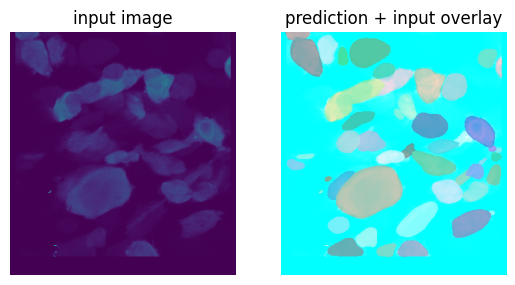

In [46]:
second_chan = img_collagen[0,:,:,1]
second_chan = np.expand_dims(second_chan, 2)
second_chan.shape
display_stardist(second_chan, stardist_fluo)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


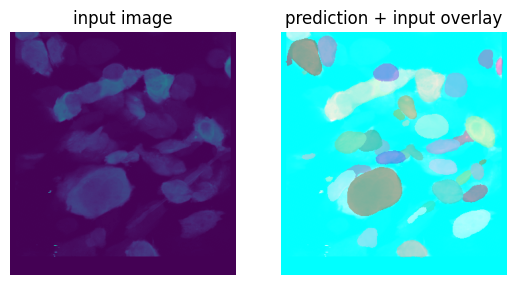

In [47]:
display_stardist(second_chan, stardist_paper)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


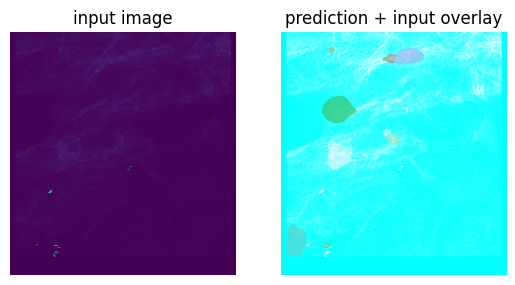

In [48]:
first_chan = img_collagen[0,:,:,0]
first_chan = np.expand_dims(first_chan, 2)
display_stardist(first_chan, stardist_fluo)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


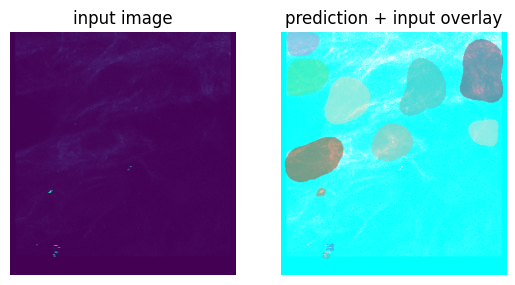

In [49]:
display_stardist(first_chan, stardist_paper)

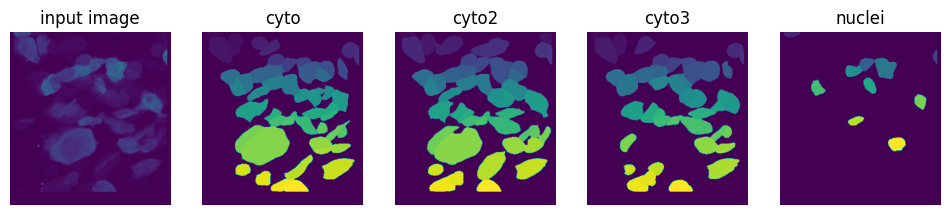

In [66]:
display_cellpose(img_collagen[0], all_cellpose, [0,0])

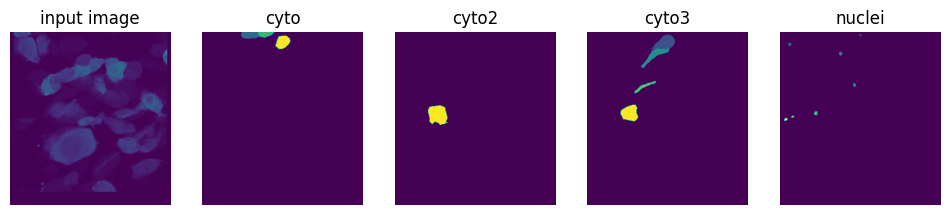

In [64]:
display_cellpose(img_collagen[0], all_cellpose, [1,0])

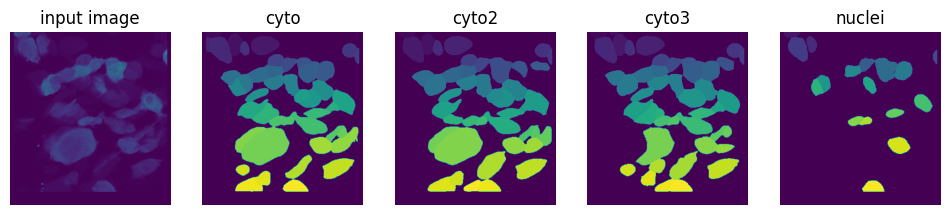

In [61]:
display_cellpose(img_collagen[0], all_cellpose, [2,0])